# (Ford Go Bike 2017 Data Visualization)
## by (Mourad Elzeiny)

### Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#prelim)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Summary](#summary)

## Data Analysis is about telling a story , so lets tell a wonderfull story

### Imagine yourself riding a bike and enjoying the breathtaking views of San Francisco, enjoing the sea views and many more wonderfull views...... oh what a great moments.!...... But stop the imagination for a while ...you need firstly to know more about the best stations , avoiding rush hours , and best time for your ride......so lets take a tour and visualizing some data in order to enjoy your ride.....


<a id='intro'></a>
## Introduction

> Ford GoBike is the Bay Area's .It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.

>The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration

> for more information:(https://en.wikipedia.org/wiki/Bay_Wheels)

> Data source:(https://www.lyft.com/bikes/bay-wheels/system-data)

## Exploring data regarding our main goals

> exploring our data considered to be one of the most stages as we know more about data types , info, nulls and shape

> we only explore and clean data which will help us achieve our research goals which is : ruch hours per day , types of riders , relationship between rush hours and users types .s

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import nbconvert

%matplotlib inline

In [10]:
# loading data...
df = pd.read_csv('2017fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


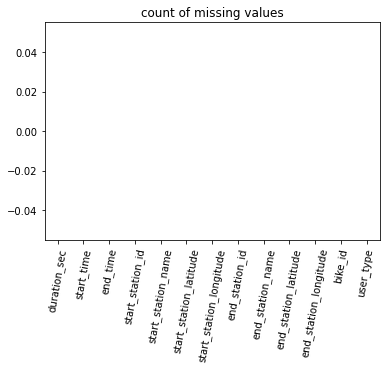

In [4]:
# is there any null values on the dataset
null_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(null_counts.index.values, null_counts, color = base_color)
plt.xticks(rotation = 80)
plt.title('count of missing values');

## no missing values

## wrangling and cleaning some data for analysis purpose

### Quality data issues

- change duration column from sec to min 
- saprate data and time on start and end time columns

### Tidness data issues
- Drop some columns which will not be important on our research (start_station_id , start_station_latitude , start_station_longitude , end_station_id , end_station_latitude , end_station_longitude)

In [5]:
#make a new dataframe before warngling to keep the original one 
df_ford = df.copy()
df_ford.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [6]:
# modifing time data type
df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])

# change type of data for further visualization
#change bike_id type to string
df_ford['bike_id'] = df_ford['bike_id'].astype('str')

#change user_type to category
df_ford['user_type'] = df_ford['user_type'].astype('category')
# test
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 48.1+ MB


In [7]:
#separate time data column & and change column duration in to min.

# separate date
df_ford['start_date'] = df_ford['start_time'].dt.date
df_ford['end_date'] = df_ford['end_time'].dt.date

#separate monthes
df_ford['start_month'] = df_ford['start_time'].dt.month_name().str.slice(stop=3)
df_ford['end_month'] = df_ford['end_time'].dt.month_name().str.slice(stop=3)
df_ford.head()

#separate days
df_ford['start_week'] = df_ford['start_time'].dt.weekday_name.str.slice(stop=3)
df_ford['end_week'] = df_ford['end_time'].dt.weekday_name.str.slice(stop=3)

#separate hour
df_ford['start_hour'] = df_ford['start_time'].dt.hour
df_ford['end_hour'] = df_ford['end_time'].dt.hour

#change sec to min in duration column
df_ford['duration_min']=df_ford['duration_sec']/60

In [8]:
#test
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,start_date,end_date,start_month,end_month,start_week,end_week,start_hour,end_hour,duration_min
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,16,15,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,15,13,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,22,11,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,17,10,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Subscriber,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,14,2,726.716667


In [9]:
# dropping columns whcih is unimportant for visualization

df_ford.drop(['duration_sec','start_time','end_time','start_station_latitude','start_station_latitude',
             'start_station_longitude', 'end_station_latitude',
             'end_station_longitude'], axis = 1, inplace=True) 

In [10]:
df_ford.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,start_date,end_date,start_month,end_month,start_week,end_week,start_hour,end_hour,duration_min
0,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,16,15,1335.166667
1,284,Yerba Buena Center for the Arts (Howard St at ...,96,Dolores St at 15th St,88,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,15,13,1313.333333
2,245,Downtown Berkeley BART,245,Downtown Berkeley BART,1094,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,22,11,762.800000
3,60,8th St at Ringold St,5,Powell St BART Station (Market St at 5th St),2831,Customer,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,17,10,1036.200000
4,239,Bancroft Way at Telegraph Ave,247,Fulton St at Bancroft Way,3167,Subscriber,2017-12-31,2018-01-01,Dec,Jan,Sun,Mon,14,2,726.716667


### What is the structure of your dataset?

> The dataset consists of  519700 records of bike trips in 2017. with many variables regarding these trips , for instance (start_time, duration , start_station , end_station ..... 

### What is/are the main feature(s) of interest in your dataset?

> The main featurs is regarding the time and places for the ride 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think features like : duration , start and end time , station names and bike id will be helpfull on my investigation!

## Univariate Exploration

> In this section, we explore the data and detect is there any data which need to be cleaned , and also explore the data as each variable and count of frequencies inside it

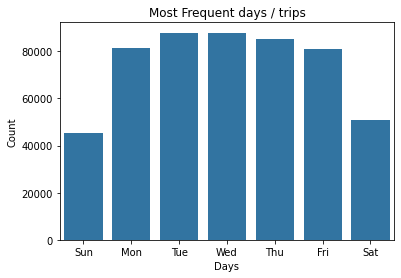

In [17]:
#finding the most
week_days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
base_color = sb.color_palette()[0]
sb.countplot(data=df_ford, x = 'start_week', color = base_color, order = week_days);
plt.xlabel('Days');
plt.ylabel('Count');
plt.title('Most Frequent days / trips');

##### Observation 1: Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system, however Thursdays, Mondays and Fridays are in the second palce . The count drops significantly on Saturdays and Sundays . which indicate that the system is used primarily for commuting purposes during working days.

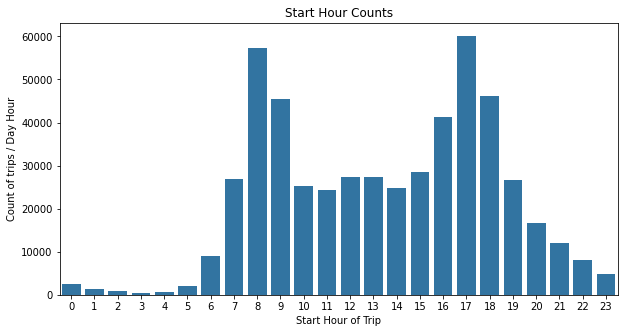

In [18]:
plt.figure(figsize = [10,5])
sb.countplot(data=df_ford, x='start_hour', color=base_color);
plt.xlabel('Start Hour of Trip');
plt.ylabel('Count of trips / Day Hour');
plt.title('Start Hour Counts');

##### Observation 2: we can conclude that there are two rush hours periods , the first one from (8 to 10) and the second one from (16 to 18) , while the average period for trips is from 10 to 15, which is a typical workday in the United States. 

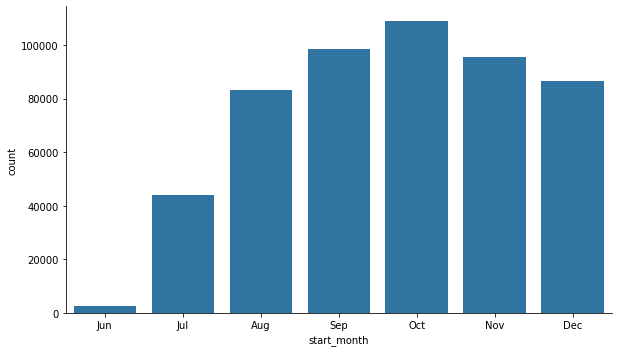

In [19]:
months = [ 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sb.catplot(data = df_ford, x = 'start_month', kind = 'count', color = base_color,order = months,  aspect = 1.7);

#### AS we see that there is no any data from January to May,  as the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company In June 2017

##### Observation 3: it seems that , the summer months and early-mid autumn are the most popular times. October is the most popular month, with september as the second most popular

In [20]:
df_ford.duration_min.describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

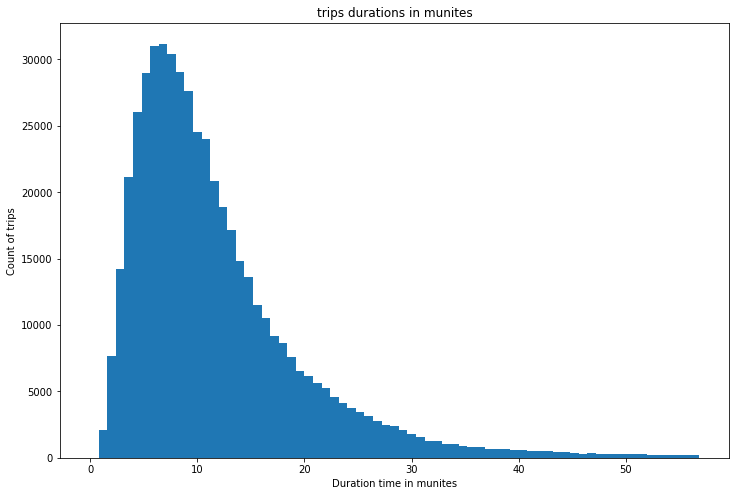

In [21]:
# we can use standard deviation as the maxumium for x bar
binsize = 0.8
bins = np.arange(0, 57, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df_ford, x = 'duration_min', bins = bins)
plt.xlabel('Duration time in munites');
plt.ylabel('Count of trips');
plt.title('trips durations in munites');


##### Observation 4: The average trip time is about 18 minutes, with 75% of trips being under 15 minutes. . This suggests that riders are taking the bikes  for short distances. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As we have deal with the data types and clean our data , we donnot meet any surprices

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes we have do some operation to make data more tidy , especiaaly to deal with time and date as, there are the core of analysis , regarding the rest of data it is okay .

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables to detect is any variable affects the other

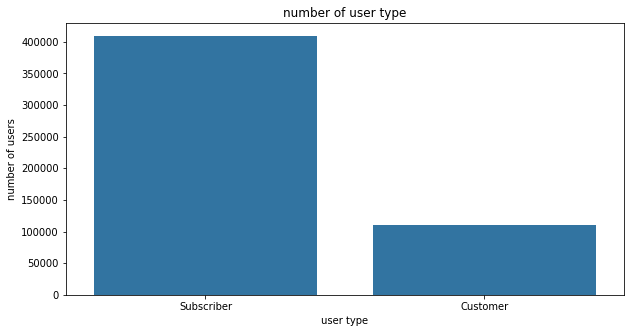

In [22]:
# know the majority of usertype is there are customers or subscribers

plt.figure(figsize = [10, 5])

sb.countplot(data = df_ford, x = "user_type", order = df_ford.user_type.value_counts().index, color = base_color);
plt.xlabel('user type');
plt.ylabel('number of users');
plt.title('number of user type');


##### Observation 1: The number of subscribers is trible it on customer , which is due to the highly benfits for subscribers as : Single rides cost 2 dollar  per trip  while memberships cost  15 dollar per month and 149 dollar per year 

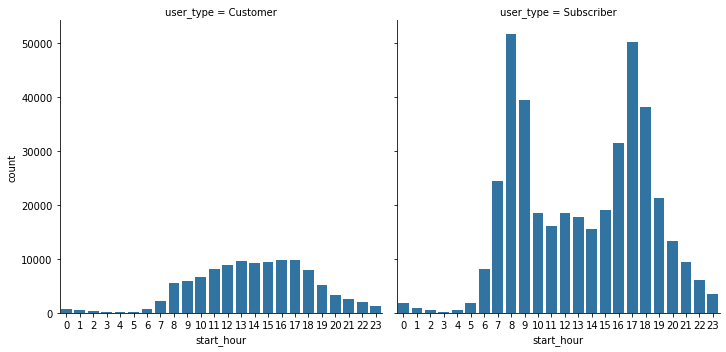

In [23]:
# comparing the rush hours for each group
# Customer Usage by Month vs. Subscriber Usage by Month

sb.catplot(data=df_ford, x='start_hour', col="user_type", kind='count', sharey = True,color = base_color );

##### Observation 2: Customers group apperars to avoid rush hours for riding which is opposite to the subscribers which use the system apparently for work trips

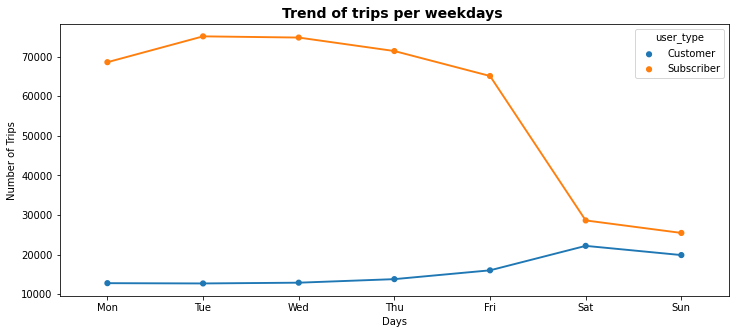

In [24]:
plt.figure(figsize=(12, 5))

df_ford_wdays = df_ford.groupby(['start_week', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.pointplot(data=df_ford_wdays, x='start_week', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Trend of trips per weekdays ', y=1, fontsize=14, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Number of Trips');

##### Observation 3: This shape  showing the  the significat contrast between Customers and Subscribers, subscribers  show high numbers on the week days whcih is opposite to customers who shows the highly demand on the system for trips on weekends . by the way we cannot deny the big differance in the numbers for the two groups , so it mean we need further invistigation 

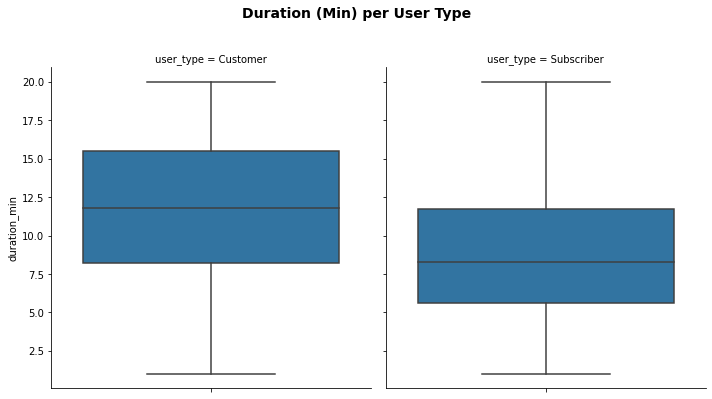

In [27]:
# comparing the duration of the trips fro customers and subscribers

# As most of our data (75%) on our duration column is under 16 min , we will query the data to under 20 min

data = df_ford.query('duration_min < 20')
f = sb.catplot(data=data, y='duration_min', col="user_type", kind='box')
f.fig.suptitle('Duration (Min) per User Type', y=1.1, fontsize=14, fontweight='bold');

##### Observation 4: The graphes show that in genral the subscribers group has lowerst rates in centers factors comparing to the customer group , This may be give us a proof that the subscribers uses the system for short trips to working palces or school and universities

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> This section considered to be a complementary to the previous one ,In this section we depends on type of user , showing the relations between it and other variables , the variable relations vary between the two groups(customer and subscribers) for example : subscribers trips numbers appears to be highly in week days with short durations , by contrast customers is relatively high on week ends with more duration for the trips.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No surprises on this dataset , but it appears that as we dive in analysis we may prove that the subscribers using the system for work or daily trips , while the customers are the tourists


## Multivariate Exploration

> In this section we will go further showing more relations between variables

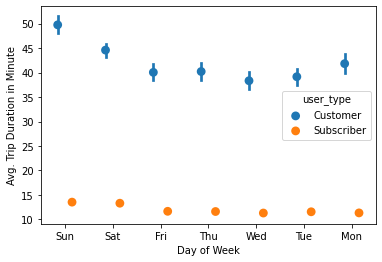

In [26]:
# average trip duration etween customers and subscribers on weekdays

sb.pointplot(data= df_ford, x='start_week', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Days');
plt.ylabel('Avg. Trip Duration in Minute');

##### Observation1: The graphes show that Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders , while subscribers ride much shorter/quicker trips compared to customers on each day , 


<Figure size 432x288 with 0 Axes>

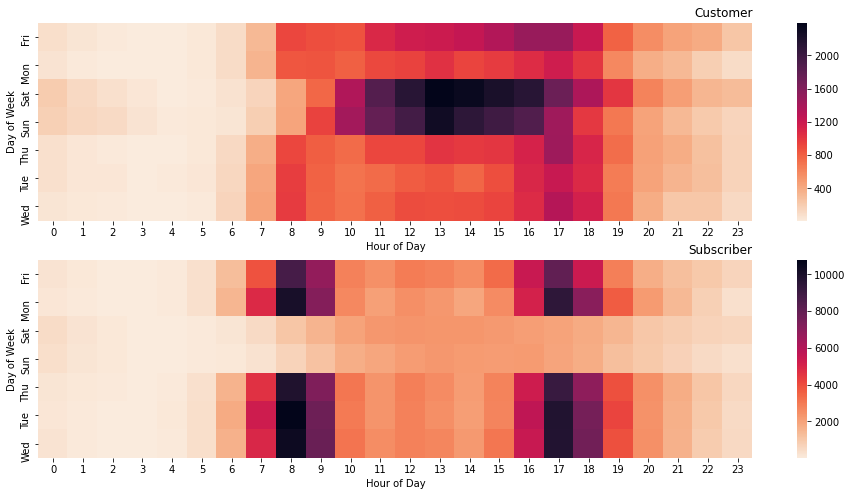

In [35]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
#fig, ax = plt.subplots(figsize=(5,5)) 

plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = df_ford.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_week', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_week', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_ford.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_week', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_week', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


##### Observation2: The graph show significent different for usage of system  between the two type of riders in daily hours. Subscribers use the system heavily on work days on normal working rush hours  while  customers ride a lot on weekends, especially in the afternoon. (from 12 to 5 pm)


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration amplified the previous data topics of exploration through different visuals and adding in more variables to compare to other variables, we can say that the short period trips of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, which indicating the use of the system  for work commute while The more relaxing and flexible pattern show for the  customer use shows that they use the system  heavily over weekends and in the afternoon, for city tour or leisure purpose probably.

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here. AS the habits for subscribers direct with their work or education purposes , while the habits for customers indicate that the users uses system for city tour or leisure purpose probably

### summary
> Here we are at the end of our story , So I highly advised any one like to take a ride on  San Francisco and enjoying this wonderfull city to visit it on summer , No matter if you want to have your ride on weekends , please try to avoid rush hours , most convenient hours will be on afternoon from 10 to 5 pm
